In [5]:
#import estential tool
import rdkit
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
import torch_geometric
from torch_geometric.datasets import MoleculeNet
from torch_geometric.data import Data
import networkx as nx
import seaborn as sb
import sklearn
from sklearn.metrics import mean_squared_error

#for trainning
from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")
import torch
from torch.nn import Linear
from torch.nn import init
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

seed_value = 42
torch.manual_seed(seed_value)
np.random.seed(seed_value)
# Download dataset

data = MoleculeNet(root=".", name="ESOL")
print("Dataset features: ", data.num_features)
print("Dataset length: ", data.len)
print("Dataset sample: ", data[0])

Dataset features:  9
Dataset length:  <bound method InMemoryDataset.len of ESOL(1128)>
Dataset sample:  Data(x=[32, 9], edge_index=[2, 68], edge_attr=[68, 3], smiles='OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ', y=[1, 1])


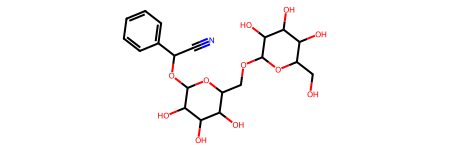

In [3]:
molecule = Chem.MolFromSmiles(data[0]["smiles"])
molecule

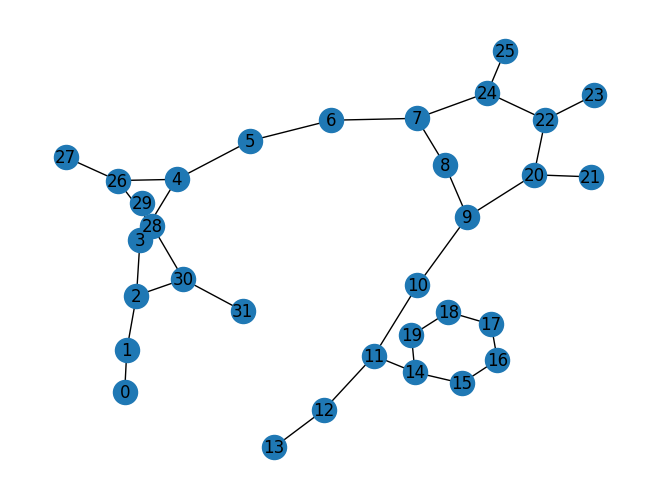

In [4]:
show = Data(x=data[0].x, edge_index=data[0].edge_index)
g = torch_geometric.utils.to_networkx(show, to_undirected=True)
nx.draw(g,pos=nx.spring_layout(g,seed = 2),with_labels=True)